In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set()

In [2]:
stocks = "GOOG SPY".split()
start = dt.date.today() - dt.timedelta(365)

In [3]:
data = pdr.get_data_yahoo(stocks, start)["Close"]
data.head()

Symbols,GOOG,SPY
Date,,
2021-02-17,2128.310059,392.390015
2021-02-18,2117.199951,390.720001
2021-02-19,2101.139893,390.029999
2021-02-22,2064.879883,387.029999
2021-02-23,2070.860107,387.500000


In [4]:
returns = (np.log(data).diff()).dropna()
returns.head()

Symbols,GOOG,SPY
Date,,
2021-02-18,-0.005234,-0.004265
2021-02-19,-0.007614,-0.001768
2021-02-22,-0.017408,-0.007721
2021-02-23,0.002892,0.001214
2021-02-24,0.011671,0.010959


In [5]:
sample= returns.sample(60).corr()
sample

Symbols,GOOG,SPY
Symbols,,
GOOG,1.000000,0.772737
SPY,0.772737,1.000000


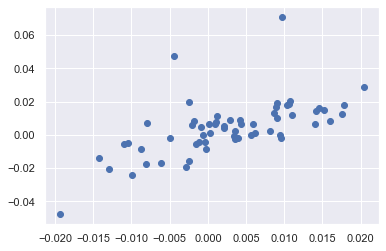

In [6]:
sample = returns.sample(60)
plt.scatter(x=sample['SPY'], y=sample['GOOG']);

In [7]:
reg = np.polyfit(sample['SPY'], sample['GOOG'], deg = 1)
reg

array([1.19011581e+00, 1.14038736e-03])

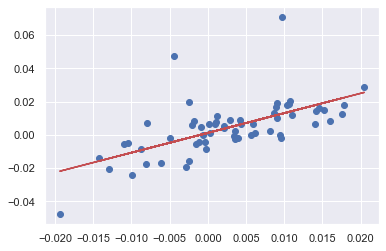

In [8]:
trend = np.polyval(reg, sample['SPY'])
plt.scatter(sample['SPY'], sample['GOOG'])
plt.plot(sample["SPY"], trend, 'r');

In [9]:
# indicador com regressão linear
data = pd.DataFrame(pdr.get_data_yahoo('SPY', start)['Close'])
time = np.arange(1, len(data) + 1)
data['time'] = time
data = data[['time', 'Close']]
data = round(data,2)
data.tail()

,time,Close
Date,,
2022-02-11,251,440.46
2022-02-14,252,439.02
2022-02-15,253,446.10
2022-02-16,254,446.60
2022-02-17,255,437.06


In [10]:
reg = np.polyfit(data['time'], data["Close"], deg = 1)
reg

array([2.95734064e-01, 3.97141961e+02])

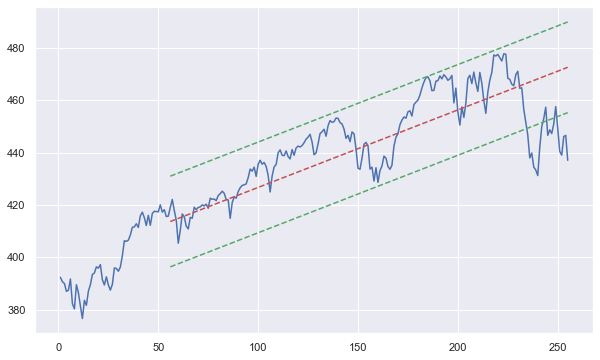

In [14]:
trend = np.polyval(reg, data['time'][-200:])
std = data['Close'][-200:].std()
plt.figure(figsize=(10,6))
plt.plot(data['time'], data['Close'], label ="S&P500")
plt.plot(data['time'][-200:], trend, 'r--')
plt.plot(data['time'][-200:], trend - std, 'g--')
plt.plot(data['time'][-200:], trend + std, 'g--');

In [15]:
predict = np.poly1d(reg)
predict(300)

485.8621805426897

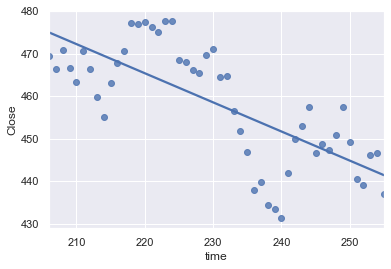

In [20]:
sns.regplot(x='time', y='Close', ci=None, fit_reg=True, data=data[-50:]);